# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

Three Observable trends based on the data:

1. There is a clear relationship between Max Temperature and Latitude. The data clearly displays an increasing Max Temp as you approach the Equator.

2. It surprised me that there is not a strong relationship between Humidity and Latitude. I expected Humidity to be similar to Max Temperature.

3. There is no significant relationship between Latitude and either Cloudiness or Wind Speed. I initially thought that Wind Speed seemed to increase at the poles and the Equator, but the regression does not shop a relationship.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
import scipy.stats as st
from scipy.stats import linregress
from datetime import datetime
from pprint import pprint

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# Save base URL for API calls set units to Imperial for correct data ranges
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&"

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#empty city weather list
city_weather = []

#loop through each city creating dictionary using API calls
for city in cities:
    
    response = requests.get(url + "appid=" + weather_api_key + "&q=" + city).json()

    response
    
    try:
        
        weather_dict = {"City": response['name'],
                        "Lat": response['coord']['lat'],
                        "Lng": response['coord']['lon'],
                        "Max Temp": response['main']['temp_max'],
                        "Humidity": response['main']['humidity'],
                        "Cloudiness": response['clouds']['all'],
                        "Wind Speed": response['wind']['speed'],
                        "Country": response['sys']['country'],
                        "Date": response['dt']
                        }
                        
    
        city_weather.append(weather_dict)

        #print log of cities found                                         
        print (f"City Name: {response['name']} / ID:{response['id']}")

    except:
        
        #print report of missing data
        print("Missing city...skipping | " + city)
   

City Name: Punta Arenas / ID:3874787
City Name: Ribeira Grande / ID:3372707
City Name: Sapouy / ID:2355869
City Name: Bairiki Village / ID:7601762
City Name: Kapaa / ID:5848280
City Name: Samarai / ID:2132606
City Name: Avarua / ID:4035715
City Name: Cairns / ID:2172797
City Name: Ocós / ID:3592086
City Name: Richards Bay / ID:962367
City Name: Haicheng / ID:2037086
City Name: Tasiilaq / ID:3424607
City Name: Joura / ID:1268823
City Name: Ternate / ID:1624041
Missing city...skipping | ambodifototra
City Name: Turukhansk / ID:1488903
City Name: Bredasdorp / ID:1015776
City Name: Jinchang / ID:1805733
City Name: Hasaki / ID:2112802
City Name: Pedasí / ID:3703239
City Name: Tuktoyaktuk / ID:6170031
City Name: Yellowknife / ID:6185377
City Name: Guipavas / ID:3014213
City Name: Rikitea / ID:4030556
City Name: Sillod / ID:1256269
City Name: Bluff / ID:2206939
City Name: Cidreira / ID:3466165
Missing city...skipping | sumbawa
City Name: Labuhan / ID:8079926
City Name: Lagoa / ID:3372964
City

City Name: Marsaxlokk / ID:2562247
City Name: Tevriz / ID:1489661
City Name: Tanete / ID:1629965
City Name: San Jerónimo / ID:3929611
City Name: Helena / ID:5656882
City Name: Abu Dhabi / ID:292968
City Name: Kanali / ID:2463705
City Name: Pinhão / ID:3453777
City Name: Faanui / ID:4034551
City Name: Marsh Harbour / ID:3571913
City Name: Ayutla / ID:4017924
City Name: Asău / ID:686090
City Name: Cherskiy / ID:2126199
City Name: Ati / ID:2436400
City Name: Sitka / ID:5557293
City Name: Denpasar / ID:1645528
City Name: Linguère / ID:2249281
City Name: Lluta / ID:3936088
City Name: Westport / ID:4845585
City Name: Casma / ID:3896281
City Name: Longyearbyen / ID:2729907
City Name: NEDJO / ID:330120
City Name: Mareeba / ID:2158767
Missing city...skipping | umzimvubu
City Name: Fortuna / ID:5563839
City Name: Yulara / ID:6355222
City Name: Comodoro Rivadavia / ID:3860443
City Name: Naze / ID:1855540
City Name: Morant Bay / ID:3489440
City Name: Raja / ID:368246
City Name: Tateyama / ID:18505

City Name: Homer / ID:5864145
City Name: Oranjestad / ID:3577154
City Name: Marquette / ID:5000950
City Name: Novosergiyevka / ID:517982
City Name: Kamenka / ID:553766
City Name: Rafai / ID:236524
City Name: Ust'-Barguzin / ID:2013986
City Name: Pacific Grove / ID:5380437
City Name: Nizwá / ID:286987
City Name: Bubaque / ID:2374583
City Name: Santa Fe / ID:3836277
City Name: Punalūr / ID:1259243
City Name: Igarka / ID:1505991
City Name: Codrington / ID:2171099
City Name: Songjianghe / ID:2034691
City Name: Totness / ID:3382867
City Name: Bahía Blanca / ID:3865086
City Name: Umm Kaddadah / ID:364933
Missing city...skipping | bolungarvik
City Name: Santo Augusto / ID:3449476
City Name: Meulaboh / ID:1214488
City Name: Jaicós / ID:3397660
City Name: San Policarpo / ID:1688696
City Name: Selma / ID:5394329
City Name: Berdigestyakh / ID:2026861
Missing city...skipping | huazolotitlan
City Name: Mayo / ID:4362001
Missing city...skipping | mouzakion
City Name: Pilar / ID:3392126
City Name: Si

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#create city weather dataframe and export to a .csv file
city_weather_df = pd.DataFrame(city_weather)

city_weather_df.to_csv(r'../cities.csv', index=False, header=True)

city_weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Punta Arenas,-53.15,-70.92,33.80,74,75,5.82,CL,1594927232
1,Ribeira Grande,38.52,-28.70,71.60,73,75,4.70,PT,1594927252
2,Sapouy,11.55,-1.77,76.28,84,3,6.15,BF,1594927252
3,Bairiki Village,1.33,172.98,80.60,78,75,4.70,KI,1594927252
4,Kapaa,22.08,-159.32,80.60,78,20,10.29,US,1594927000
...,...,...,...,...,...,...,...,...,...
560,Pokhara,28.23,83.98,73.53,82,86,1.59,NP,1594927308
561,Kozhva,65.11,57.05,54.72,81,82,6.22,RU,1594927308
562,Zaraza,9.35,-65.32,85.78,75,73,2.13,VE,1594927015
563,Miguel Hidalgo,19.42,-99.20,73.40,38,20,8.05,MX,1594927010


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#  Get the indices of cities that have humidity over 100%.
# Set length of cities with humidity over 100 to a variable
# .loc finds any rows with Humidity over 100 and returns the length of rows it finds
x = len(city_weather_df.loc[city_weather_df['Humidity'] > 100])

print(x)

#If there are cities with Humidity greater than 100 create new dataframe without those rows
if x > 0:
    
    # Make a new DataFrame equal to the city data to drop all humidity outliers by index.
    clean_city_df = city_weather_df[city_weather_df['Humitidy'] > 100]
    
    clean_city_df = clean_city_df.reset_index(drop=True)
    
    # Export the City_Data into a csv
    clean_city_df.to_csv(r'../cities.csv', index=False, header=True)

0


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

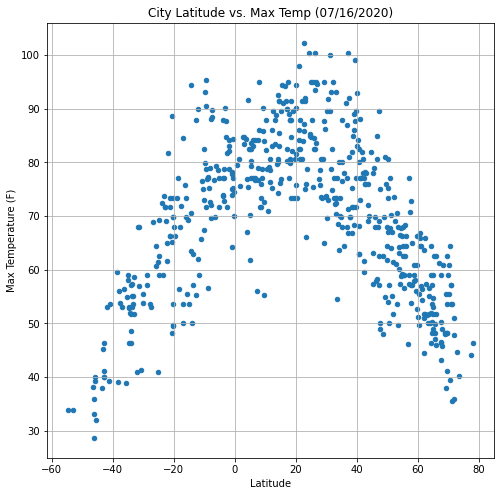

In [7]:
# Create a scatter plot which compares latitude and max temperature
current_time = datetime.now()
date = current_time.strftime('%m/%d/%Y')
title_with_date = f'City Latitude vs. Max Temp ({date})'

city_weather_df.plot(kind="scatter", x="Lat", y="Max Temp", grid=True, figsize=(8,8),
                  title= title_with_date)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.savefig('maxtemp_vs_lat.png', dpi=300, bbox_inches = 'tight')
plt.show()


Observation: The max temperature definitely increases as you approach the Equator.

## Latitude vs. Humidity Plot

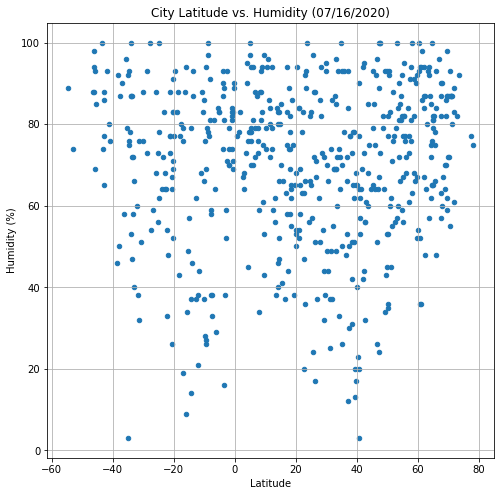

In [8]:
#create a scatter plot which compares Latitude and Humidity
title_with_date = f'City Latitude vs. Humidity ({date})'

city_weather_df.plot(kind="scatter", x="Lat", y="Humidity", grid=True, figsize=(8,8),
                  title= title_with_date)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig('humidity_vs_lat.png', dpi=300, bbox_inches = 'tight')
plt.show()

Observation: There does not seem to be a strong relationship between Latitude and Windspeed, although wind speed seems to be highter in general at the poles and right at the Equator.

## Latitude vs. Cloudiness Plot

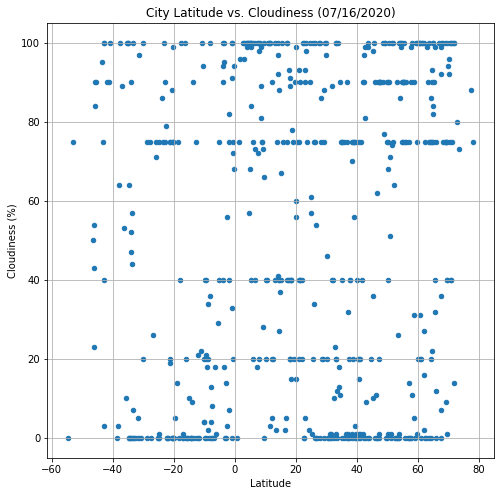

In [9]:
#create a scatter plot which compares Latitude and Cloudiness
title_with_date = f'City Latitude vs. Cloudiness ({date})'

city_weather_df.plot(kind="scatter", x="Lat", y="Cloudiness", grid=True, figsize=(8,8),
                  title= title_with_date)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig('cloudiness_vs_lat.png', dpi=300, bbox_inches = 'tight')
plt.show()

Observation: the points seem evenly scattered I don't see a relationship between Latitude and Cloudiness.

## Latitude vs. Wind Speed Plot

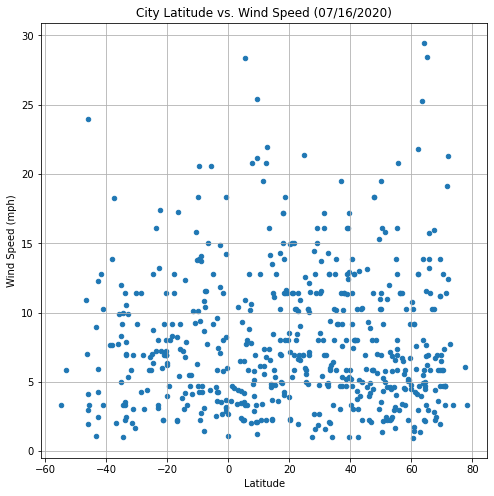

In [10]:
#create a scatter plot which compares Latitude and Wind Speed
title_with_date = f'City Latitude vs. Wind Speed ({date})'

city_weather_df.plot(kind="scatter", x="Lat", y="Wind Speed", grid=True, figsize=(8,8),
                  title= title_with_date)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig('windspeed_vs_lat.png', dpi=300, bbox_inches = 'tight')
plt.show()

Observation: The Northern Hemisphere seems to have higher winds in general than the Southern Hemisphere. It could have to do with seasons?

## Linear Regression

In [11]:
# OPTIONAL: Create a function to create Linear Regression plots
#Regimen Quartile, Outlier, Boxplot function
def linear_regression(x_values, y_values, x_label, y_label, line_x, line_y):

    
    #linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(line_x, line_y),fontsize=15,color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    print(f"The r-squared is: {rvalue**2}")
    plt.show()

        
    




In [12]:
# Create Northern and Southern Hemisphere DataFrames
#Northern Hemisphere Dataframe
northern_hemisphere_df = city_weather_df.loc[city_weather_df['Lat'] > 0]
#print(northern_hemisphere_df)

southern_hemisphere_df = city_weather_df.loc[city_weather_df['Lat'] < 0]
#print(southern_hemisphere_df)

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.563640546821312


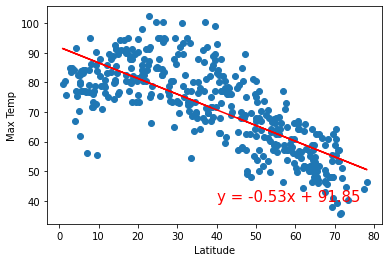

In [13]:
#call function to perform linear regression on the data
linear_regression(northern_hemisphere_df['Lat'],northern_hemisphere_df['Max Temp'], 'Latitude', 'Max Temp', 40, 40)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6594085129677212


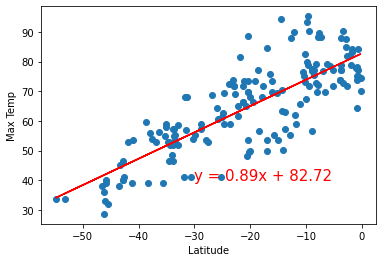

In [14]:
#call function to perform linear regression on the data
linear_regression(southern_hemisphere_df['Lat'],southern_hemisphere_df['Max Temp'], 'Latitude', 'Max Temp', -30, 40)

Observation on these 2 regressions: There is a strong relationship between Max Temp and Latitude in both the Northern and Southern Hemispheres. Both r values are above .5 + and -.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.009504706801148531


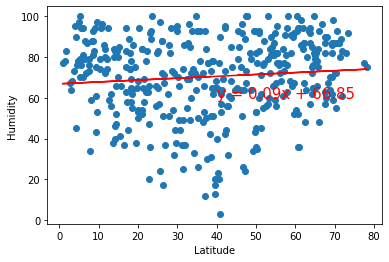

In [15]:
#call function to perform linear regression on the data
linear_regression(northern_hemisphere_df['Lat'], northern_hemisphere_df['Humidity'], 'Latitude', 'Humidity', 40, 60)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.021981242734475638


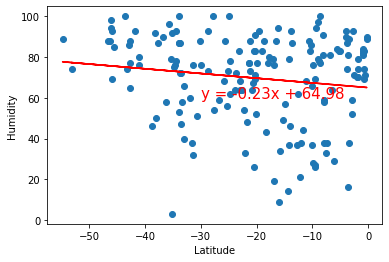

In [16]:
#call function to perform linear regression on the data
linear_regression(southern_hemisphere_df['Lat'], southern_hemisphere_df['Humidity'], 'Latitude', 'Humidity', -30, 60)

Observation on these 2 regressions: There is a very minimal relationship between Latitude and Humidity in both Hemispheres.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0003969016782774138


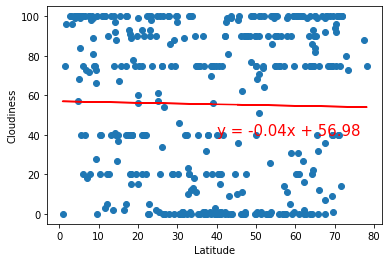

In [17]:
#call function to perform linear regression on the data
linear_regression(northern_hemisphere_df['Lat'],northern_hemisphere_df['Cloudiness'], 'Latitude', 'Cloudiness', 40, 40)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.017602576183889645


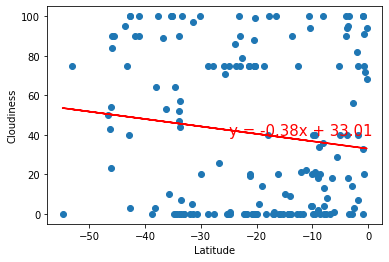

In [18]:
#call function to perform linear regression on the data
linear_regression(southern_hemisphere_df['Lat'],southern_hemisphere_df['Cloudiness'], 'Latitude', 'Cloudiness', -25, 40)

Observation on these 2 regressions: There is not a significant relationship between Latitude and Cloudiness in either hemisphere, but by and even bigger degree in the Southern Hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.000948547029425511


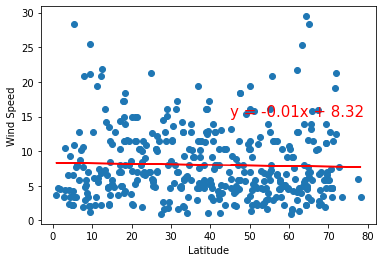

In [19]:
#call function to perform linear regression on the data
linear_regression(northern_hemisphere_df['Lat'],northern_hemisphere_df['Wind Speed'], 'Latitude', 'Wind Speed', 45, 15)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.004953123206085762


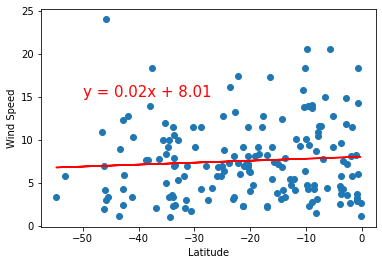

In [20]:
#call function to perform linear regression on the data
linear_regression(southern_hemisphere_df['Lat'],southern_hemisphere_df['Wind Speed'], 'Latitude', 'Wind Speed', -50, 15)

Observation on these 2 regressions: There is a very minimal relationship between Latitude and Wind Speed in both Hemispheres.